## Purpose: fit Harmonic models

Demonstration: 
    1. Use of linear model
    2. Evidence to determine the order.

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from HarmonicModel import HarmonicModel
from Fitter import Fitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 63
sig = 0.4

make a 3-degree polynomial

In [3]:
x = numpy.linspace( 0, 3.0, N, dtype=float )
y = numpy.asarray( [10,9,8,7,6,5,4,3,2,1,0,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]*3, dtype=float )


Define the model

In [4]:
mdl = HarmonicModel( 1 )
print( mdl )


Harmonic: f( x:p ) = p_0 * cos( xx ) + p_1 * sin( xx ); xx = 2 * pi * x / period


define the fitter: Fitter

In [5]:
fitter = Fitter( x, mdl )
 
# find the parameters
param = fitter.fit( y )

  

In [6]:
print( "Parameters :", fmt( param ) )
print( "StDevs     :", fmt( fitter.stdevs ) )
print( "Chisq      :", fmt( fitter.chisq ) )
print( "Scale      :", fmt( fitter.scale ) )
evidence = fitter.getEvidence( limits=[-100,100] )
print( "Evidence   :", fmt( evidence ) )
print( "Covar matrix :" )
print( fmt( fitter.covariance))

Parameters : [    0.000    6.574]
StDevs     : [    0.705    0.716]
Chisq      :   970.462
Scale      :     3.989
Evidence   :  -241.178
Covar matrix :
[[    0.497   -0.000]
 [   -0.000    0.513]]


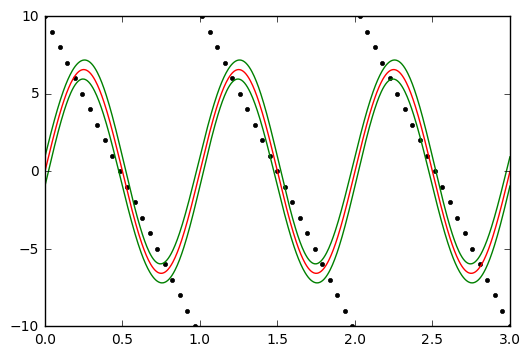

In [7]:
plotFit( x, y, mdl, ftr=fitter )

A simple sinusoid is not enough. Lets see how many orders we need 

Evidence    -174.086  order 2
Evidence    -147.452  order 3
Evidence    -134.978  order 4
Evidence    -129.056  order 5
Evidence    -126.693  order 6
Evidence    -126.473  order 7
Evidence    -127.644  order 8


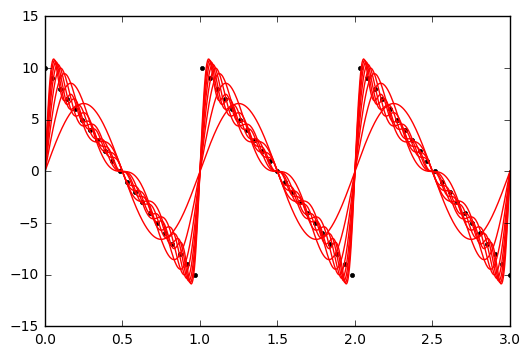

In [8]:
plotFit( x, y, model=mdl, show=False )
order = 2
limits = [-100,100]
while 1 :
    mdl = HarmonicModel( order )
    fitter = Fitter( x, mdl )
    param = fitter.fit( y )
    newevid = fitter.getEvidence( limits=limits )
    print( "Evidence   %s  order %d" % ( fmt( newevid ), order ) )
    plotFit( x, model=mdl, show=False )
    if newevid < evidence : 
        break
    evidence = newevid
    order += 1

plt.show()
order -= 1


The best model is one with order 7.


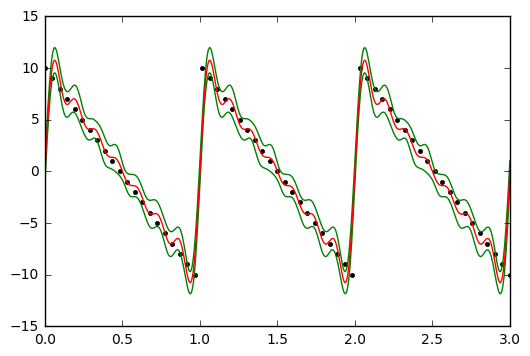

In [9]:
mdl = HarmonicModel( order )
fitter = Fitter( x, mdl )
par = fitter.fit( y )
plotFit( x, y, mdl, ftr=fitter )